<a href="https://colab.research.google.com/github/wilberquito/AMLProject/blob/main/AMLProject_finalnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project: Image Classification
## Advanced Machine Learning


> Wilber E. Bermeo Quito 
>
> Judit Quintana Massana
>
> April 2023

*You can find the source code at [this repository](https://gitfront.io/r/wilberquito/6M8XPemf3m6W/AMLProject/)*

## Introduction

In the subject of 'Advanced Techniques of Machine Learning', we have been asked to build an artificial intelligence for image classification using a deep learning approach. In this coursework, we are going to use the international dataset CIFAR-10, consisting of 60.000 32x32 color images of 10 different object classes (6.000 images per class).

The aim of this paper is to show what steps we have followed to configure our machine learning model.


### CIFAR-10 dataset

The CIFAR-10 dataset is a collection of 60,000 images that are commonly used for machine learning and computer vision research. The dataset contains 10 classes of objects, with 6,000 images per class. Each image is a 32x32 color image in the RGB format, meaning that each pixel is represented by three values representing the intensity of red, green, and blue color channels.

The 10 classes in the CIFAR-10 dataset are:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

The dataset is split into three parts: a training set a validation set and a test set. The training set contains 40,000 images, while the test set contains 10,000 images, as well as the valid set. All datasets contain a balanced number of images per class.

### Used tool: pytorch

PyTorch is a popular open-source machine learning framework that is widely used for building and training neural networks. There are several reasons why this tool is a good choice for working with the CIFAR-10 dataset. 

It's efficient at data loading: PyTorch provides efficient data loading and preprocessing utilities, such as the DataLoader and Transform classes, which can help efficiently load and preprocess the images in the CIFAR-10 dataset. Flexibility: Unlike other tools like fastAI, Pytorch is highly costumable. Has a large and growing ecosystem of third-party packages and libraries, has a Pythonic interface, which makes it easy to write custom code to modify and extend the framework, PyTorch's dynamic computation graph also makes it easier to debug neural networks...

#### Transfer learning

Transfer learning is a machine learning technique that involves taking a pre-trained neural network and adapting it to a new task. Instead of starting from scratch and training a neural network from random initialisation, transfer learning allows you to leverage the knowledge and features learned from a pre-existing neural network that has been trained on a related task.

In the case of the CIFAR-10 dataset, transfer learning can be particularly useful because the dataset is relatively small, with only 60,000 images. This can make it challenging to train a deep neural network from scratch, as the network may not have enough data to learn meaningful features. By using transfer learning, you can leverage the pre-trained features of a neural network that has been trained on a similar task, such as the ImageNet dataset, which contains millions of images.

#### Fine-tuning

Fine-tuning in machine learning refers to the process of taking a pre-trained model and then further training it on a specific task or dataset.

When we fine-tune a pre-trained model, we don't start the training process from scratch; instead, we use the pre-trained model's learned features and weights as a starting point, and then continue training on the new dataset. This process helps the model learn more specialized features for the new dataset and can significantly improve the model's performance.

Fine-tuning is commonly used in transfer learning, where we use pre-trained models as a starting point for training new models for specific tasks.

## Code structure

We have structured our notebook for working with exernal scripts. This handmade scripts contain the logic of the program and are stored in the modular folder. 

 - **Utils** -  Contains a set of diferent funtions to visualize, setup and modify models. 
 - **Optim** - Contains the optimizers.
 - **Engine** - Contains functions for training and testing a PyTorch model.
 - **Models** - Contais the diferent models used.
 - **Evaluate** - Script to evaluate models the different models.
 - **Datasets** - Loads datasets
 - **Ensemble** - Script to ensemble predictions from differents models.



## Methodology

We have used a simple but effective methodology to obtain the bests results. 

We have trained 7 different models using diferent pre-trained neuronal networks:
 - [EfficientNet_V2_S](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_v2_s.html#efficientnet-v2-s)
 - [Resnet34](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet34.html)
 - [Resnet50](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html)
 - [Resnet50 with FastAI configuration](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html)
 - [Resnet50 with exotic configuration](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html)
 - [RESNEXT50_32X4D](https://pytorch.org/vision/main/models/generated/torchvision.models.resnext50_32x4d.html#resnext50-32x4d)
 - [Resnet101](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet101.html)
 - [MAXVIT_T](https://pytorch.org/vision/main/models/generated/torchvision.models.maxvit_t.html)

All this models have gone though a 2-3 fine-tuning training and a 10 epoch training. 

Finally we have grouped the best ones to build an ensemble. 

- EfficientNet_V2_S
- Resnet50
- Resnet50 with FastAI configuration
- Resnet50 with exotic configuration
- Resnet101
- AMLMAXVIT_T


### Ensemble

Ensemble learning is a machine learning technique where multiple models are trained and combined to improve the overall performance of the system. The idea behind ensemble learning is to use the strengths of different models and combine their predictions to make more accurate and robust predictions than any single model.

The project has 2 kind of ensemble.

- Probability average assembling
- Test time data augmentation

### Transormations applied
 - Resize which resizes the image to a square shape of 232x232 pixels using bilinear interpolation method. The max_size argument is not set, so the image is not resized if any of its dimensions are already smaller than 232 pixels. If antialias is set to 'warn', it will emit a warning message if antialiasing cannot be performed.
 - CenterCrop, which crops the center of the image to a size of 224x224 pixels.
 - ToTensor, which converts the image to a PyTorch tensor.
 - Normalize, which normalizes the tensor by subtracting the mean and dividing by the standard deviation of the RGB color channels.

## Loading and visualizing the dataset

If you want to execute the notebook by your own, we inite you joining the [shared google drive folder](https://drive.google.com/drive/folders/1T3k3CwOzGuR_HCJ-imZP6k_wJsE16MP3?usp=sharing) where all the data relies. 

To make it work, you have to put it in 'My Drive' as a shortcut folder. You can follow the instructions of how to do it [here](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop).

In [1]:
#importing required libraries to import files from google colab
import zipfile
from pathlib import Path

In [2]:
#assuring we are working in colab environment
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
#downloading data and python scripts
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    data_path = Path('/content/drive/MyDrive/AML/dataset_CIFAR10.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall("data")

    data_path = Path('/content/drive/MyDrive/AML/modular.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall(".")

Mounted at /content/drive


In [4]:
#installing torch vision
if IN_COLAB:
    ! pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


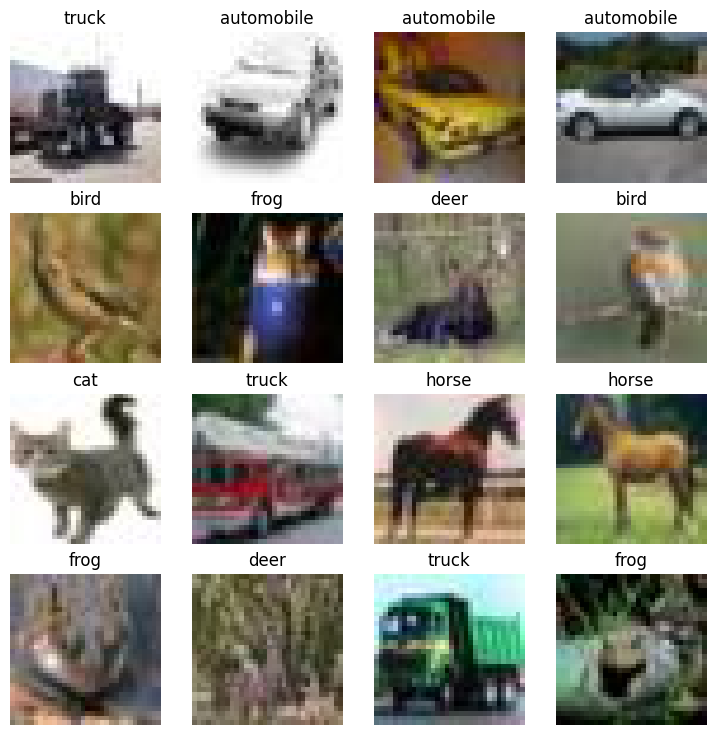

In [5]:
#importing required libraries to visualize data
import torchvision
import modular.utils as utils
import torchvision.transforms as transforms

#preview of the dataset
prev_dataset = torchvision.datasets.ImageFolder(root='data/train',transform=transforms.ToTensor())
utils.show_grid_preview(prev_dataset)

## Model training

In [6]:
#geting the trained models
!rm -rf trained
!cp -rf /content/drive/MyDrive/AML/trained ./trained

In [7]:
#installing torch info
if IN_COLAB:
  ! pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import torch
from modular.utils import plot_loss_curves

#loading model
def load_model(path):
  #load model
  if torch.cuda.is_available():
      # If CUDA is available, load the object onto the device
      device = torch.device('cuda')
      return torch.load(Path(path))
  else:
      # If CUDA is not available, load the object onto the CPU
      return torch.load(Path(path), map_location='cpu')

#showing model results
def print_res(net):
  print("RESULTS:")
  print("train loss: ", net['train_loss'][-1])
  print("test loss: ", net['test_loss'][-1])
  print("train accuracy: ", net['train_acc'][-1])
  print("test accuracy: ", net['test_acc'][-1])
  plot_loss_curves(net)

### Resnet34
ResNet-34 is a variant of the ResNet architecture that was introduced in 2015. It consists of 34 layers and is deeper than the original ResNet-18 architecture. ResNet-34 incorporates residual connections, which enable the training of deep neural networks by allowing the gradients to flow through the network more easily. The architecture includes several convolutional layers, max pooling layers, batch normalization layers, and a fully connected layer at the end. ResNet-34 is a popular architecture for image classification tasks and has been used in a variety of applications. Pre-trained models for ResNet-34 are available in many popular deep learning frameworks.

In [14]:
import modular.models as models
#loading resnet 50
amlresnet34 = models.AMLResnet34(10)
#transforms that resnet does to data
amlresnet34.transforms

Compose(
    Resize(size=232, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [15]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnet34, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet34 (AMLResnet34)                     [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 512]            --                   False
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 64, 64, 64]     --                   False
│    │    └─BasicBlock (0)                    [32, 64, 64, 64]     [32, 64, 64, 

#### Results

RESULTS:
train loss:  0.6719749699532985
test loss:  0.42459437176585196
train accuracy:  0.77055
test accuracy:  0.8511


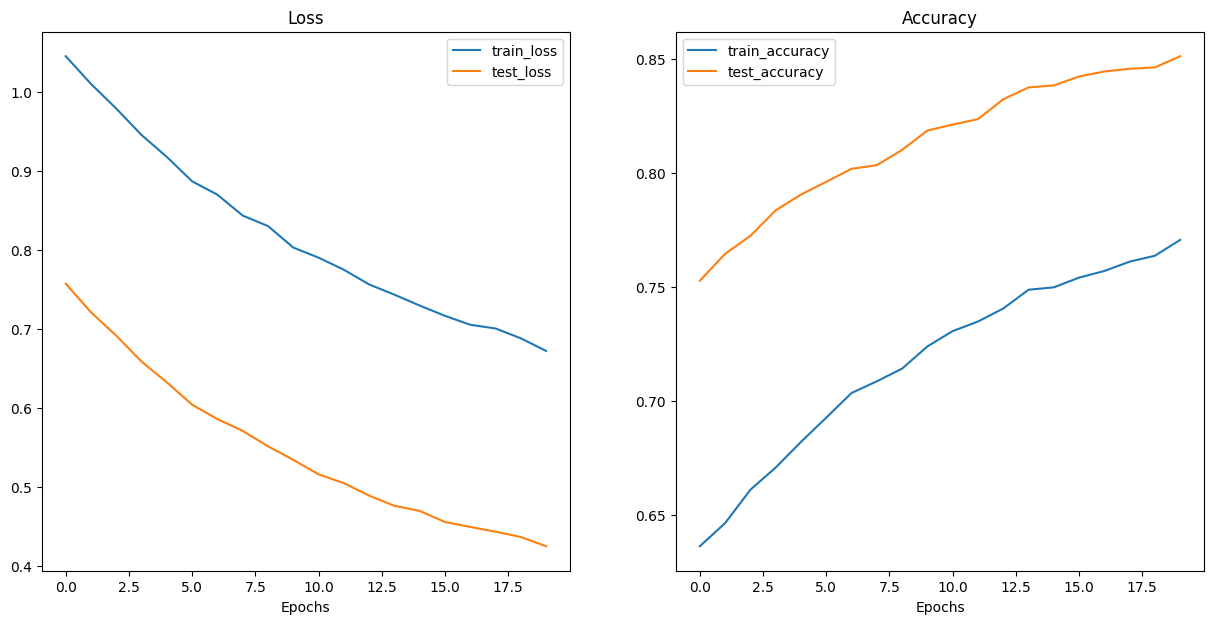

In [16]:
amlresnet34 = load_model('/content/trained/amlresnet34.pth')
print_res(amlresnet34)

### Resnet50 
ResNet50 is a 50-layer neural network architecture that uses residual connections to make it easier to train very deep neural networks. The basic idea behind residual connections is that instead of trying to learn the direct mapping from the input to the output of a layer, the neural network learns the residual mapping, which is the difference between the output and the input. This makes it easier for the neural network to learn complex features and patterns, and allows it to train deeper networks with better performance.



In [17]:
import modular.models as models
#loading resnet 50
amlresnet50 = models.AMLResnet50(10)
#transforms that resnet does to data
amlresnet50.transforms

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 76.5MB/s]


Compose(
    Resize(size=232, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnet50, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

#### Results


RESULTS:
train loss:  0.4574953841045499
test loss:  0.3578025039285421
train accuracy:  0.843625
test accuracy:  0.8751


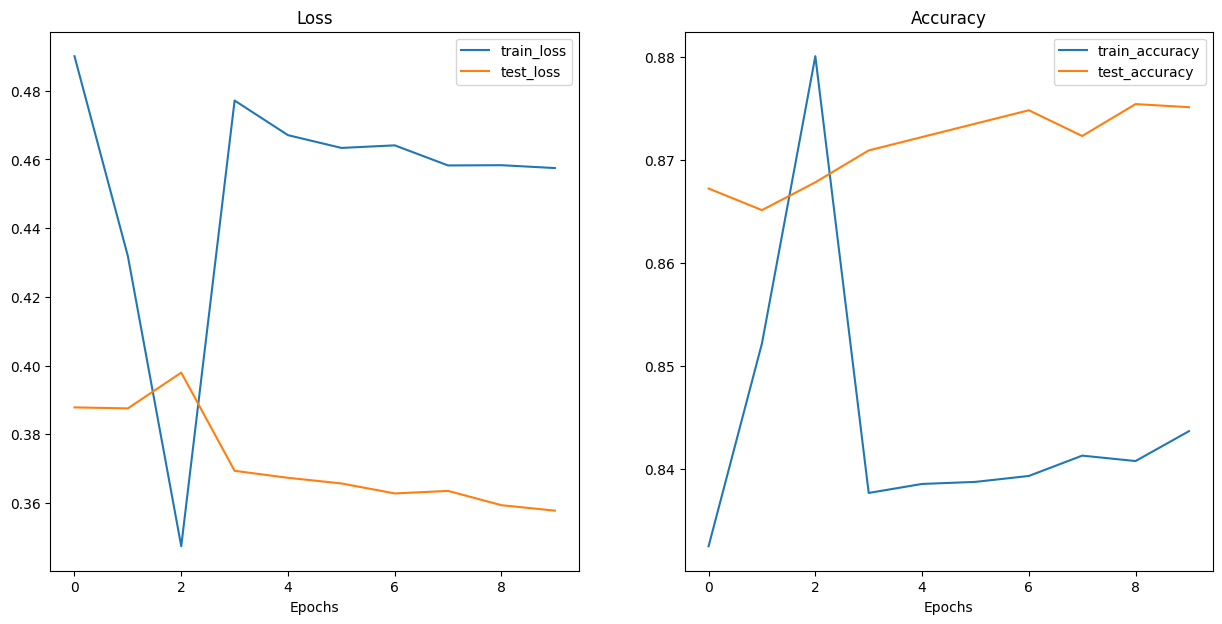

In [18]:
amlresnet50 = load_model('/content/trained/amlresnet50.pth')
print_res(amlresnet50)

### Resnet50 with FastAI configuration 
This ResNet 50 has the final layers that fastai api uses.



In [19]:
import modular.models as models
#loading resnet 50
amlresnet50_FA = models.AMLResnet50_FastAI(10)
#transforms that resnet does to data
amlresnet50_FA.transforms

Compose(
    Resize(size=232, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [20]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnet50_FA, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet50_FastAI (AMLResnet50_FastAI)       [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 10]             --                   Partial
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 6

#### Results


RESULTS:
train loss:  0.6329862055301666
test loss:  0.4743259993314743
train accuracy:  0.7788
test accuracy:  0.8347


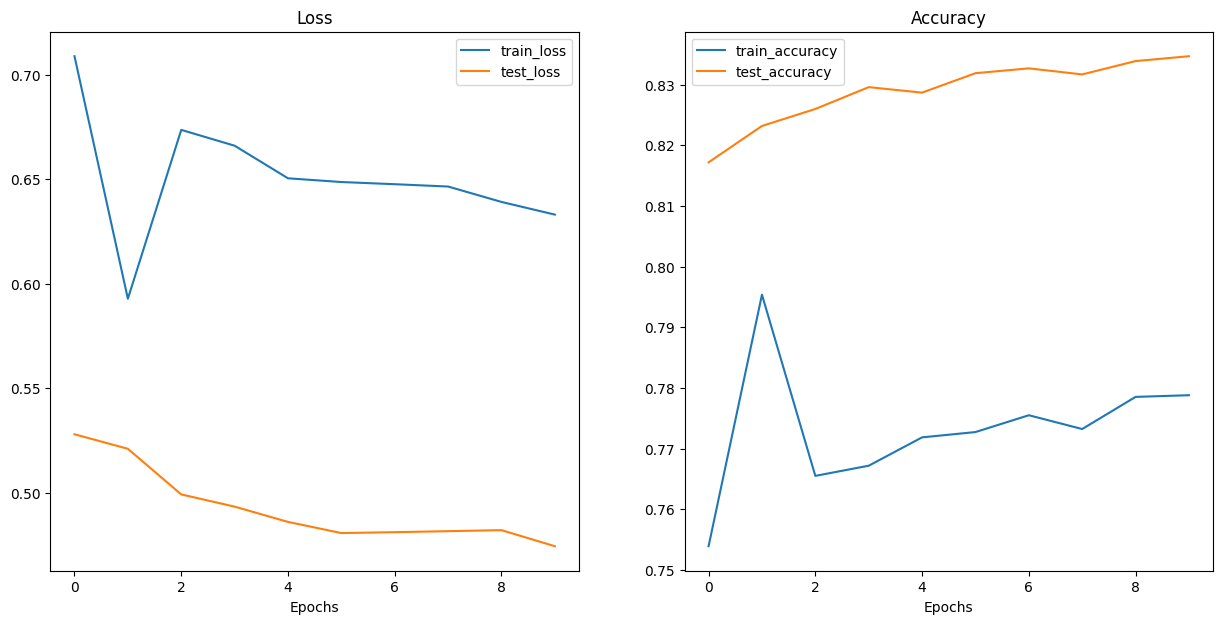

In [21]:
amlresnet50_FA = load_model('/content/trained/AMLResnet50_FastAI.pth')
print_res(amlresnet50_FA)

### Resnet50 with exotic configuration 
This ResNet 50 has been trained with 3 fine tunning epochs using `AdamW` and
in the training process it was trainned with `AdamW` and the schudler `OneCycle`.

In [22]:
import modular.models as models
#loading resnet 50
amlresnet50_exo = models.AMLResnet50(10)
#transforms that resnet does to data
amlresnet50_exo.transforms

Compose(
    Resize(size=232, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [23]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnet50_exo, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet50 (AMLResnet50)                     [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 2048]           --                   False
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 64,

#### Results


RESULTS:
train loss:  0.45552004035562277
test loss:  0.3638090807944536
train accuracy:  0.841725
test accuracy:  0.8757


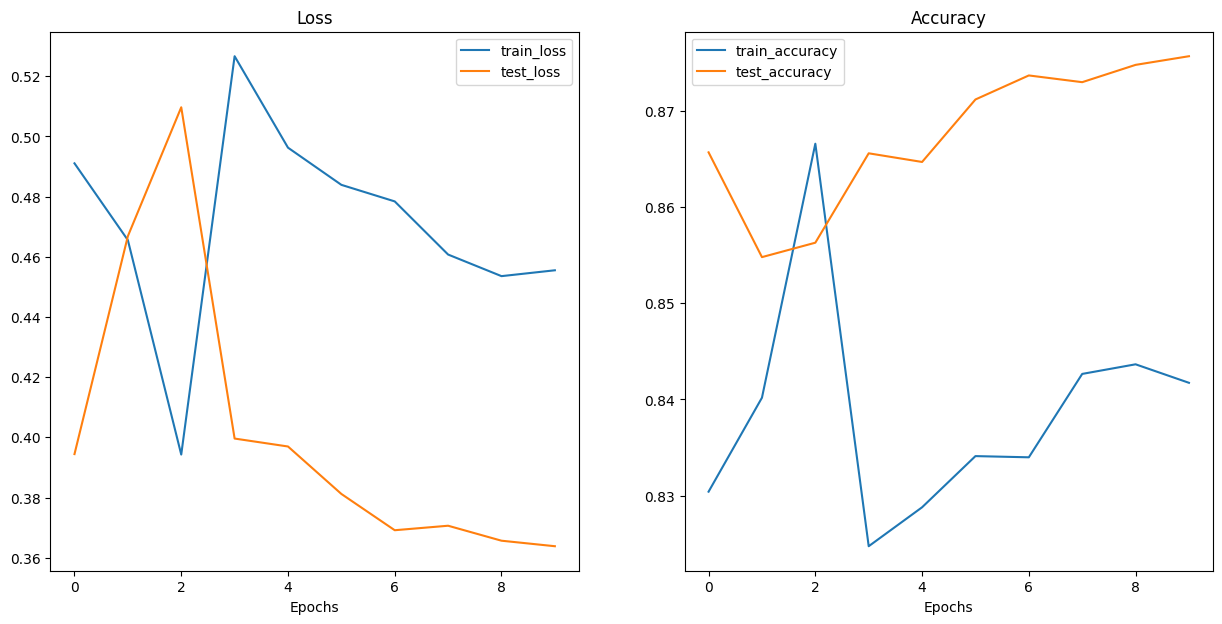

In [24]:
amlresnet50_exo = load_model('/content/trained/exotic.amlresnet50.pth')
print_res(amlresnet50_exo)

### Resnext50 32X4D
ResNeXt is a convolutional neural network architecture that was introduced in 2017. It is based on the concept of group convolutions, which involves dividing the input channels of a convolutional layer into groups and applying separate convolutions to each group. ResNeXt builds upon the ResNet architecture and uses group convolutions to provide a more flexible and efficient way of modeling the feature space. The architecture has achieved state-of-the-art performance on various image classification benchmarks, and pre-trained models for ResNeXt are available in many popular deep learning frameworks.



In [25]:
import modular.models as models
#loading resnet 50
amlresnext = models.AMLResnext_50W(10)
#transforms that resnet does to data
amlresnext.transforms

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 228MB/s]


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [26]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnext, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnext_50W (AMLResnext_50W)               [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 2048]           --                   False
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 64,

#### Results


RESULTS:
train loss:  0.7841803634643555
test loss:  0.6162830773115158
train accuracy:  0.7261
test accuracy:  0.7853


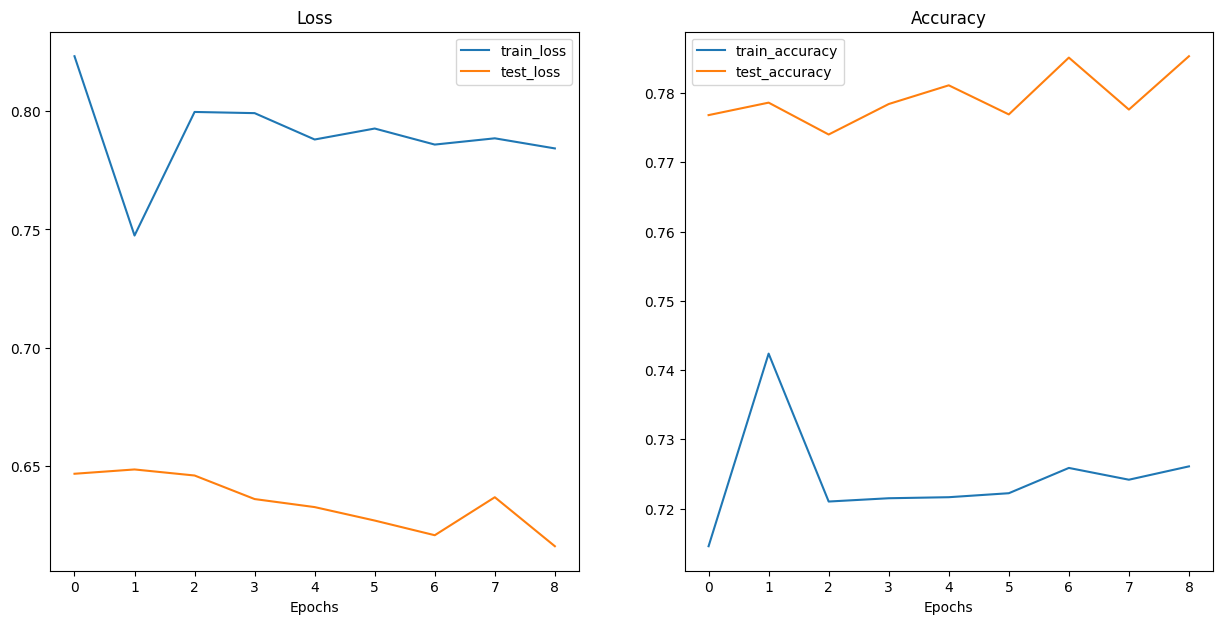

In [27]:
amlresnext = load_model('/content/trained/AMLResnet_50W.pth')
print_res(amlresnext)

### Resnet101 
ResNet-101 is a convolutional neural network architecture that was introduced in 2015 as part of the ResNet (Residual Network) family of architectures. ResNet-101 is a deeper variant of the original ResNet-50 architecture, with 101 layers. It includes multiple residual blocks with skip connections, which enable the training of deeper neural networks by mitigating the vanishing gradient problem.



In [28]:
import modular.models as models
#loading resnet 50
amlresnet101 = models.AMLResnet101(10)
#transforms that resnet does to data
amlresnet101.transforms

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 135MB/s]


Compose(
    Resize(size=232, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [29]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnet101, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet101 (AMLResnet101)                   [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 2048]           --                   False
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 64,

#### Results


RESULTS:
train loss:  0.4216001721099019
test loss:  0.3340306650847197
train accuracy:  0.853025
test accuracy:  0.8829


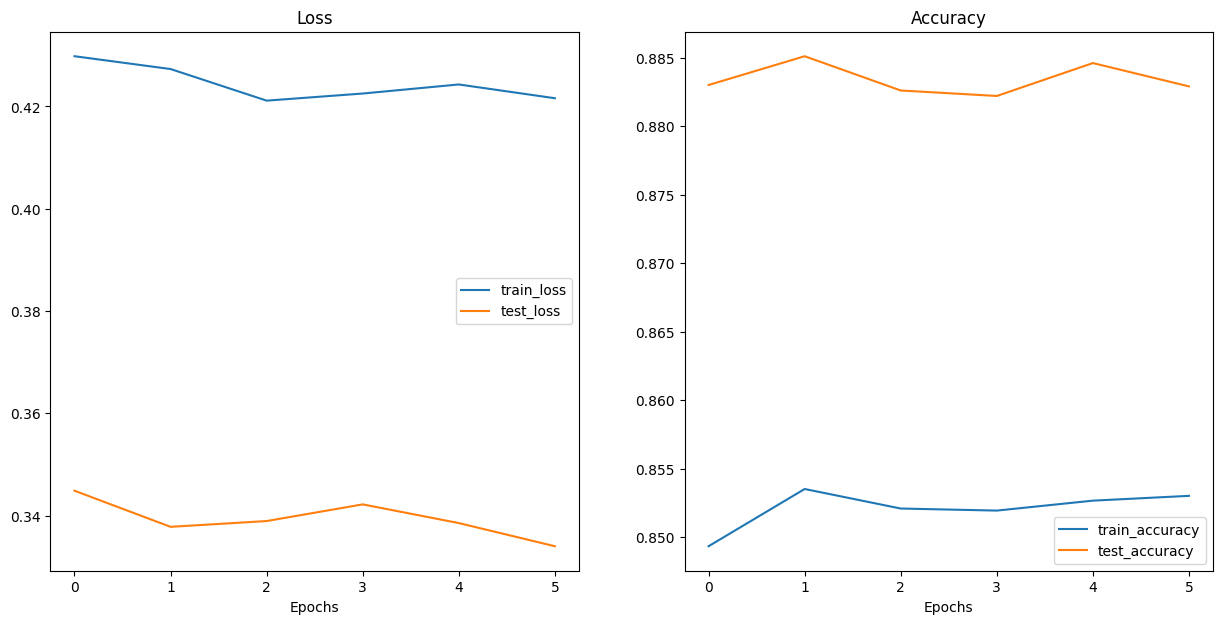

In [30]:
amlresnet101 = load_model('/content/trained/amlresnet101.pth')
print_res(amlresnet101)

### AMLMAXVIT_T 
ResNet-101 is a convolutional neural network architecture that was introduced in 2015 as part of the ResNet (Residual Network) family of architectures. ResNet-101 is a deeper variant of the original ResNet-50 architecture, with 101 layers. It includes multiple residual blocks with skip connections, which enable the training of deeper neural networks by mitigating the vanishing gradient problem.



In [31]:
import modular.models as models
#loading resnet 50
amlmaxvit = models.AMLMAXVIT_T(10)
#transforms that resnet does to data
amlmaxvit.transforms

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaxVit_T_Weights.IMAGENET1K_V1`. You can also use `weights=MaxVit_T_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://download.pytorch.org/models/maxvit_t-bc5ab103.pth" to /root/.cache/torch/hub/checkpoints/maxvit_t-bc5ab103.pth
100%|██████████| 119M/119M [00:02<00:00, 49.1MB/s]


ImageClassification(
    crop_size=[224]
    resize_size=[224]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

#### Results


RESULTS:
train loss:  0.5030210243701935
test loss:  0.3669284285187721
train accuracy:  0.8272
test accuracy:  0.8737


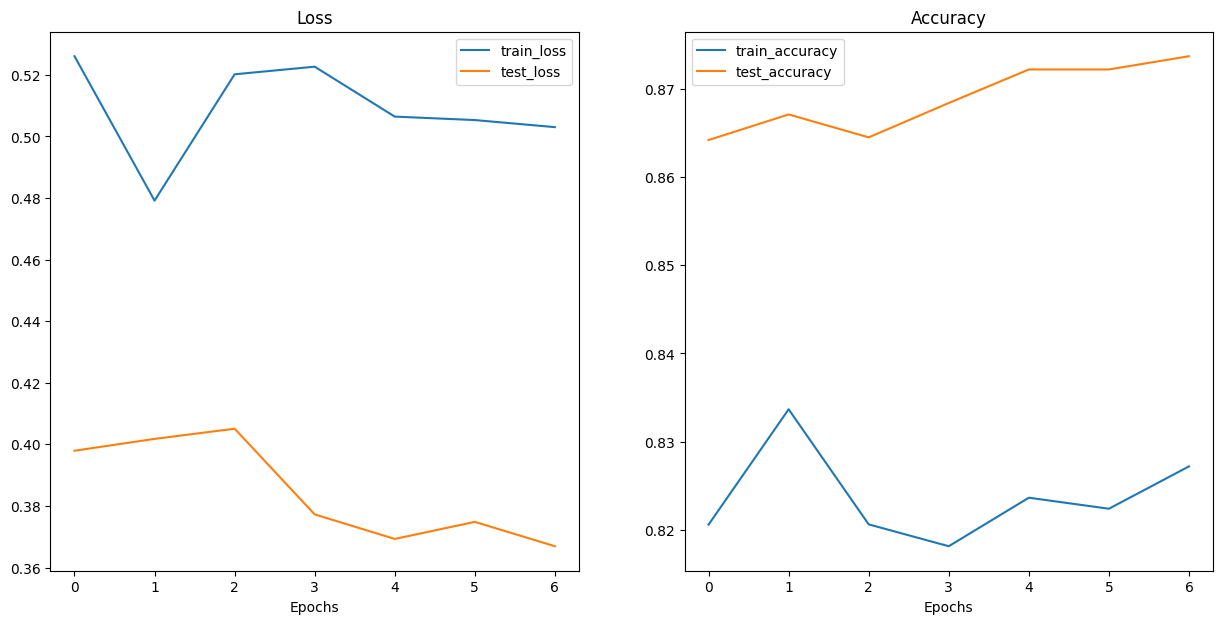

In [32]:
amlmaxvit = load_model('/content/trained/AMLMAXVIT_T.pth')
print_res(amlmaxvit)

### EfficientNet_V2_S 
EfficientNet V2_S is the smallest variant of the EfficientNet V2 family, with 2.8 million parameters. It includes a series of efficient operations, such as squeeze-and-excitation, swish activation, and mobile inverted bottleneck convolutions, that enable high accuracy while reducing computational complexity.



In [33]:
import modular.models as models
#loading resnet 50
amlefficientnetb4 = models.AMLEfficientNetB4(10)
#transforms that resnet does to data
amlefficientnetb4.transforms

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-7eb33cd5.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 131MB/s]


Compose(
    Resize(size=384, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(380, 380))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [34]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlefficientnetb4, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
AMLEfficientNetB4 (AMLEfficientNetB4)                             [32, 3, 256, 256]    [32, 10]             --                   Partial
├─EfficientNet (net)                                              [32, 3, 256, 256]    [32, 1792]           --                   False
│    └─Sequential (features)                                      [32, 3, 256, 256]    [32, 1792, 8, 8]     --                   False
│    │    └─Conv2dNormActivation (0)                              [32, 3, 256, 256]    [32, 48, 128, 128]   (1,392)              False
│    │    └─Sequential (1)                                        [32, 48, 128, 128]   [32, 24, 128, 128]   (4,146)              False
│    │    └─Sequential (2)                                        [32, 24, 128, 128]   [32, 32, 64, 64]     (66,238)             False
│    │    └─Sequential (3)                       

#### Results


RESULTS:
train loss:  0.576196009516716
test loss:  0.4693462926149368
train accuracy:  0.797675
test accuracy:  0.837


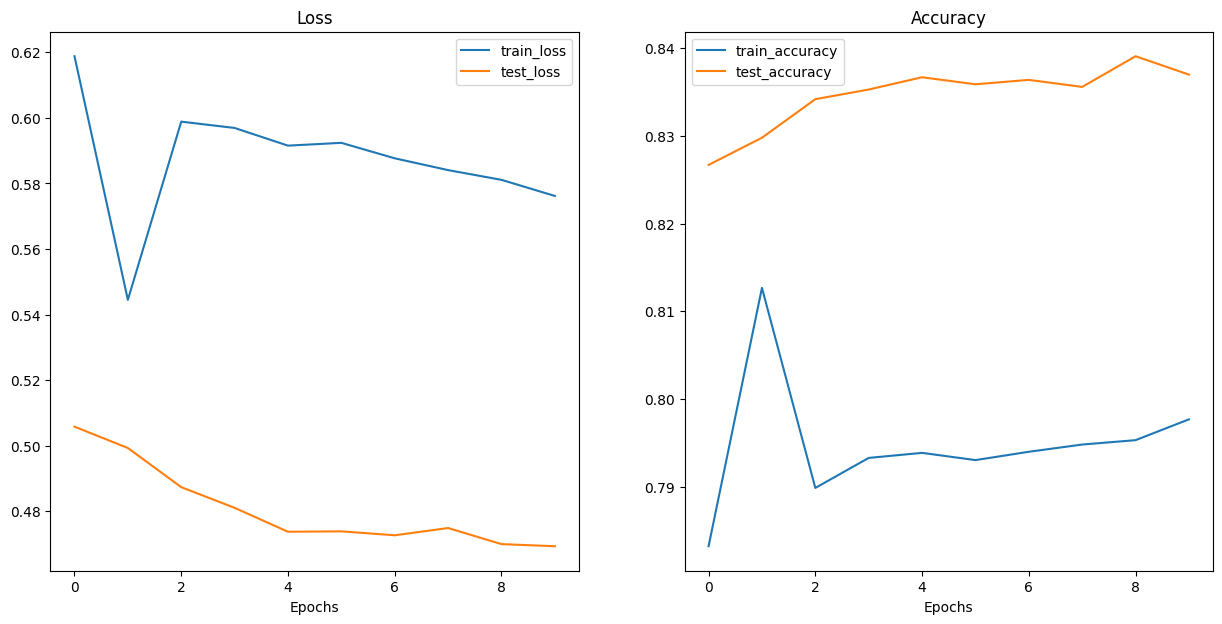

In [35]:
amlefficientnetb4 = load_model('/content/trained/efficientnet_v2_s.pth')
print_res(amlefficientnetb4)

## Ensemble of models

In this seccion we explain how the ensemble of models we add to the project works.

To see the hole process of how the ensemble works togueter open the `ensemble.ipynb` notebook.


### Test time data augmentation

Test time data augmentation (TTA) is a technique used to improve the accuracy and robustness of deep learning models during the testing phase. The basic idea behind TTA is to perform random transformations on the test data, and then use the model to make predictions on the transformed images.

We applied 4 random transformations in test time.

To acomplish the TTA we created the module `evaluate.py`, which has the funcion `val_step` which supports the model, other parameters and the numbers of test to prove in one test.

For all the images we apply this val step to make a prediction in the test step and then we save the probabilities of each image to be in a class into `csv` file, which latter we will use to make a prediction based on the probabilities predictions of each image.

Here we add the base code of the `val_step`

```python
"""
This script is thought to evaluate models.
It allows you to ensemble the predictions with
n number of test thanks to `get_transpose` fun.
"""

import torch
import torch.nn as nn
from tqdm import tqdm


def get_transpose(img: torch.Tensor, trans):
    """
    This function is thought to make some transformations
    in the image, kindof an assemble.
    """
    if trans >= 4:
        img = img.transpose(2, 3)
    if trans % 4 == 0:
        return img
    elif trans % 4 == 1:
        return img.flip(2)
    elif trans % 4 == 2:
        return img.flip(3)
    elif trans % 4 == 3:
        return img.flip(2).flip(3)


@torch.inference_mode()
def val_step(model: nn.Module,
             loader: torch.utils.data.DataLoader,
             device: torch.device,
             out_dim: int,
             n_test: int = 1):
    """
    This function evaluate a model given a loader.
    It returns a tuple of logits, probabilities and classes
    """

    model.eval()

    LOGITS = []
    PROBS = []
    LABELS = []

    for inputs, _ in tqdm(loader):

        inputs = inputs.to(device)
        logits = torch.zeros((inputs.shape[0], out_dim)).to(device)
        probs = torch.zeros((inputs.shape[0], out_dim)).to(device)

        # Multiple test
        for test in range(n_test):
            test_logits = model(get_transpose(inputs, test))
            logits += test_logits
            probs += torch.softmax(test_logits, dim=1)

        logits /= n_test
        probs /= n_test
        labels = torch.argmax(probs, dim=1)

        LOGITS.append(logits.detach().cpu())
        PROBS.append(probs.detach().cpu())
        LABELS.append(labels.detach().cpu())

    LOGITS = torch.cat(LOGITS).numpy()
    PROBS = torch.cat(PROBS).numpy()
    LABELS = torch.cat(LABELS).numpy()

    return LOGITS, PROBS, LABELS
```

### Probability average assembly

Once all the models where tested and exported the probabilities per each model and images, we picked the models that had best performance and drop 2 or 3 that they accuracy where significantly lower than the others and then we assemble them by the probabilities exported per each image.


To be fair, we aproch this problem the simplest way possible. All test has the same weight to the final prediction. The `ensemble` functions creates a file with the label predictions per each image but you can of course ask it to export also the probabilities.

Here you have the code of the `ensemble.py` module.


```python
"""
Script thought to ensemble predictions from differents models.
It requires an standard form of the predictions. All predictions
must have the same number of columns and the predictions ordered
by index. The indexes of all predictions must represent the name of
the image.
"""


import pandas as pd
from glob import glob
import os
import numpy as np


def ensemble(parent_dir: str,
             output_name: str,
             with_probs=False):
    """
    Ensemble fun, all predictions are weighted the same
    """

    all_csv = []
    for csv in sorted(glob(os.path.join(parent_dir, '*.csv'))):
        all_csv.append(pd.read_csv(csv, index_col=0))

    # Computes how many all_csv has the first csv.
    # All csv has to have the same name of samples...
    n, _ = all_csv[0].shape
    # Computes how many different csv are
    n_csv = len(all_csv)
    # Weights for each csv
    wts = [1/n_csv]*n_csv
    # Get the name of all images
    names = list(all_csv[0].index)
    # Here I save the labels predicted by the ensemble
    labels = []
    # All probs
    probs = []

    # Per each sample, I compute the average weighted,
    # of the different predictions
    for i in range(n):
        all_preds = [csv.iloc[i].values * wts[j] for j, csv in enumerate(all_csv)]
        prob = np.sum(all_preds, axis=0)
        labels.append(np.argmax(prob, axis=0))
        probs.append(prob)

    df = pd.DataFrame({
        'name': names,
        'class': labels
    })
    df.sort_values(by='name',
                   ascending=True,
                   inplace=True)
    df.to_csv(output_name, index=False)

    if with_probs:
        df = pd.DataFrame(probs)
        df.index = names
        df.to_csv('probs.' + output_name, index=True)


if __name__ == '__main__':
    ensemble('./predictions', 'ensemble.csv')
```



## Results comparision

*Disclaimer: The training of machine learning models presented has not been done correclty, and therefore, the results may not be entirely accurate. The purpose of the different plots is solely for demonstrational purposes. It is important to note that the only model that has been claimed to have correct results is the ResNet34. The other models had the base freezed during fine tune and unfreezed after. The results can be noted at the plotes*



### Loss

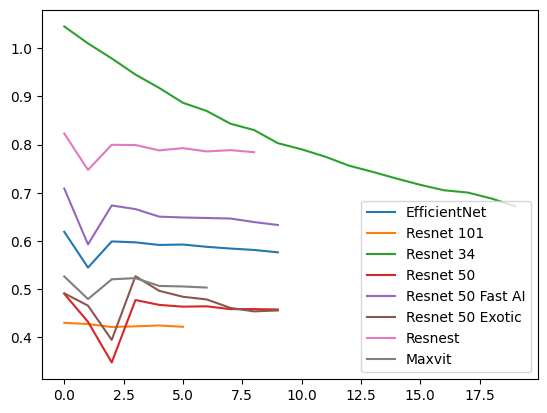

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(amlefficientnetb4['train_loss'], label='EfficientNet')
ax.plot(amlresnet101['train_loss'],label='Resnet 101')
ax.plot(amlresnet34['train_loss'],label='Resnet 34')
ax.plot(amlresnet50['train_loss'],label='Resnet 50')
ax.plot(amlresnet50_FA['train_loss'],label='Resnet 50 Fast AI')
ax.plot(amlresnet50_exo['train_loss'],label='Resnet 50 Exotic')
ax.plot(amlresnext['train_loss'],label='Resnest')
ax.plot(amlmaxvit['train_loss'],label='Maxvit')

ax.set_title('Train Loss')
ax.legend()
plt.show()

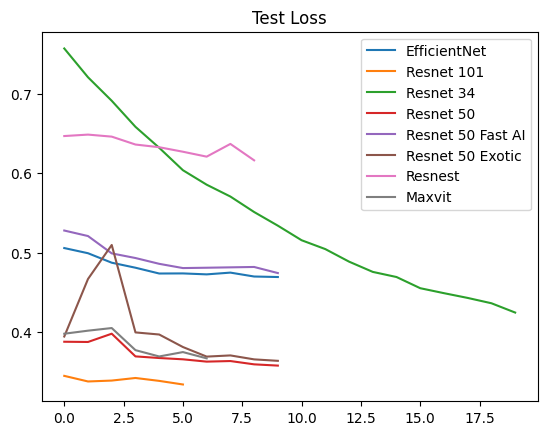

In [48]:
fig, ax = plt.subplots()
ax.plot(amlefficientnetb4['test_loss'], label='EfficientNet')
ax.plot(amlresnet101['test_loss'], label='Resnet 101')
ax.plot(amlresnet34['test_loss'], label='Resnet 34')
ax.plot(amlresnet50['test_loss'], label='Resnet 50')
ax.plot(amlresnet50_FA['test_loss'], label='Resnet 50 Fast AI')
ax.plot(amlresnet50_exo['test_loss'], label='Resnet 50 Exotic')
ax.plot(amlresnext['test_loss'], label='Resnest')
ax.plot(amlmaxvit['test_loss'], label='Maxvit')

ax.set_title('Test Loss')
ax.legend()
plt.show()

### Accuracy

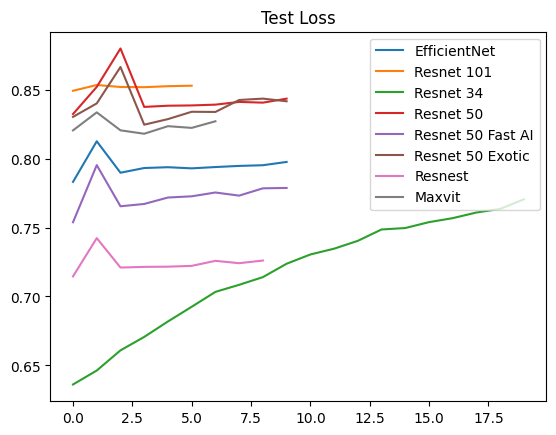

In [47]:
fig, ax = plt.subplots()
ax.plot(amlefficientnetb4['train_acc'], label='EfficientNet')
ax.plot(amlresnet101['train_acc'], label='Resnet 101')
ax.plot(amlresnet34['train_acc'], label='Resnet 34')
ax.plot(amlresnet50['train_acc'], label='Resnet 50')
ax.plot(amlresnet50_FA['train_acc'], label='Resnet 50 Fast AI')
ax.plot(amlresnet50_exo['train_acc'], label='Resnet 50 Exotic')
ax.plot(amlresnext['train_acc'], label='Resnest')
ax.plot(amlmaxvit['train_acc'], label='Maxvit')

ax.set_title('Train Accuracy')
ax.legend()
plt.show()

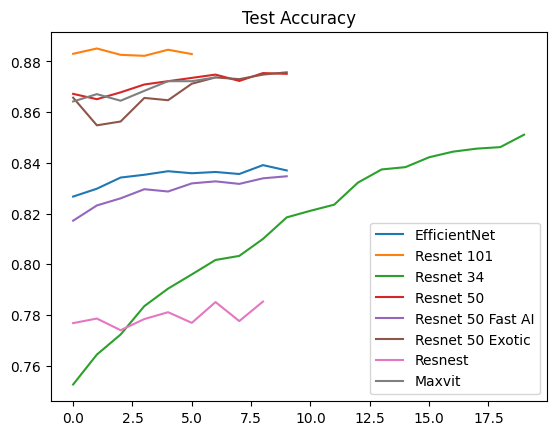

In [49]:
fig, ax = plt.subplots()
ax.plot(amlefficientnetb4['test_acc'], label='EfficientNet')
ax.plot(amlresnet101['test_acc'], label='Resnet 101')
ax.plot(amlresnet34['test_acc'], label='Resnet 34')
ax.plot(amlresnet50['test_acc'], label='Resnet 50')
ax.plot(amlresnet50_FA['test_acc'], label='Resnet 50 Fast AI')
ax.plot(amlresnet50_exo['test_acc'], label='Resnet 50 Exotic')
ax.plot(amlresnext['test_acc'], label='Resnest')
ax.plot(amlmaxvit['test_acc'], label='Maxvit')

ax.set_title('Test Accuracy')
ax.legend()
plt.show()

It's important to note that the limit date of this project may have prevented us from training the other models correctly, because we noticed our mistake too late. While we acknowledge that the results presented here may not be entirely accurate, we hope that they can still serve as a starting point for further exploration

### Final result
The ensemble of different machine learning models has yielded an accuracy of 86.22%. 

## Future Work

There are several possible avenues for future work in this project: 
 - Dataset Expansion. Evethough we have a big dataset we can use other tecniques of data aumentation to have a wide variety of images.
 - Test other pretrained models.
 - Hyperparameter Tuning. The choice of hyperparameters, such as learning rate, batch size, and regularization, can have a significant impact on the performance of a model.

These are just a few potential areas of future work. 
However, we didn't mentioned the most important one that is train again the models with the correct configuration.